# Imbalanced Classification with Python

Contributor - [Anirudh Dayma](https://www.linkedin.com/in/anirudh-dayma-457861144/)

In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from scipy import stats
from collections import Counter
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Making a custom dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                            n_clusters_per_class=1, weights=[0.9], flip_y=0, 
                            random_state=1)

In [3]:
counter = Counter(y)
print(counter)

Counter({0: 9001, 1: 999})


In [4]:
counter.items()

dict_items([(0, 9001), (1, 999)])

Unfolding the for loop<br>
`counter.items()` prints a dictionary with 2 items (because the y variables has 2 unique classes)<br>`dict_items([(0, 9001), (1, 999)])`. <br>
Using `np.where()` we try to get the indexes where label is 0 and indexes where label is 1

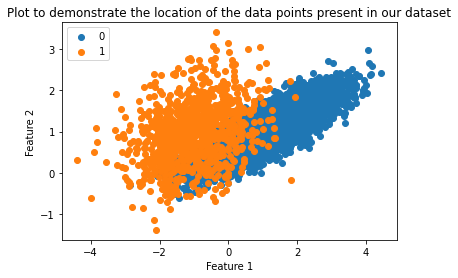

In [5]:
for label, _ in counter.items():
    index = np.where(y == label)[0]
    plt.scatter(x = X[index, 0], y = X[index, 1], label = str(label))

plt.title('Plot to demonstrate the location of the data points present in our dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

From the above plot we can clearly observe that data is highly imbalanced. We have too many data points belonging to class 0 and too few points belonging to class 1.

### Tuning different parameters of make_classification() to see its behaviour
`flip_y` would add some noise, larger the value, more the noise <br>
`n_clusters_per_class` sets the number of clusters in a particular class

In [6]:
X1, y1 = make_classification(n_samples=10000, n_features=2, n_clusters_per_class=2, 
                             n_redundant=0, flip_y=0.01, weights=[0.99])

In [7]:
counter1 = Counter(y1)
print(counter1)

Counter({0: 9843, 1: 157})


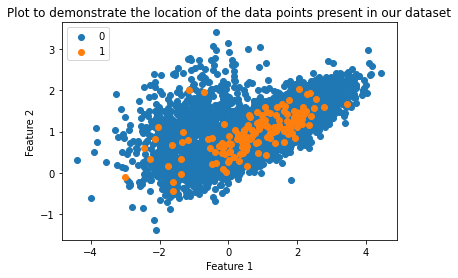

In [8]:
for label, _ in counter1.items():
    index = np.where(label == y1)[0]
    plt.scatter(x=X[index, 0], y=X[index, 1], label=str(label))
    
plt.title('Plot to demonstrate the location of the data points present in our dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Let us try to understand some terms related to classification metrics. <hr>
1. **Confusion matrix** - It depicts how our model is performing by plotting the predicted labels VS the actual labels. <br>

True Positive (TP) -> This means prediction of our model is True (correct) and the prediction made by model is 1 (+ve) <br>
True Negative (TN) -> This means prediction of our model is True (correct) and the prediction made by model is 0 (-ve) <br>
False Positive (FP) -> This means prediction of our model is False (incorrect) and the prediction made by model is 1 (+ve) <br>
False Negative (FN) -> This means prediction of our model is False (incorrect) and the prediction made by model is 0 (-ve) <br>


This the is base for all the metrics that we might come across. 

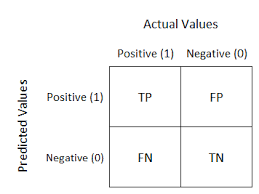<br>
[Image Source](https://miro.medium.com/max/712/1*Z54JgbS4DUwWSknhDCvNTQ.png) <hr>

2. **Sensitivity** - Also called as **Recall** and **True Positive Rate** <br>
It tells us how well our models predicts the positive labels out of all the positive labels. <hr>

3. **Specificity** - It tells us how well our model predicts the negative labels out of all the negative labels, also it is the fraction of the total amount of relevant instances that were actually retrieved. 

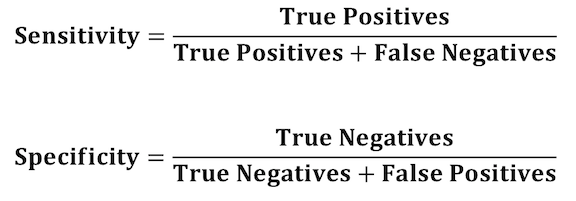<br>
[Image Source](https://miro.medium.com/max/576/1*RWwHcEAgsd-yAs7UhRLuVg.png)<hr>

4. **False Positive Rate (FPR)** - It the ratio of labels that were incorrectly classified as positive (when they are actually negative) to the total number of negative labels.

   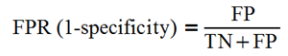 <br>
   [Image Source](https://algolytics.com/wp-content/uploads/2018/05/roc1_en.png) <hr>

5. **Precision** - It is the ratio of correctly predicted positive labels to all the labels predicted as positive by our model(correct + incorrect). It tells us how correctly our model has predicted the positive labels out all the labels that our model has predicted as positive. Also, it is the fraction of relevant instances among the retrieved instances. 

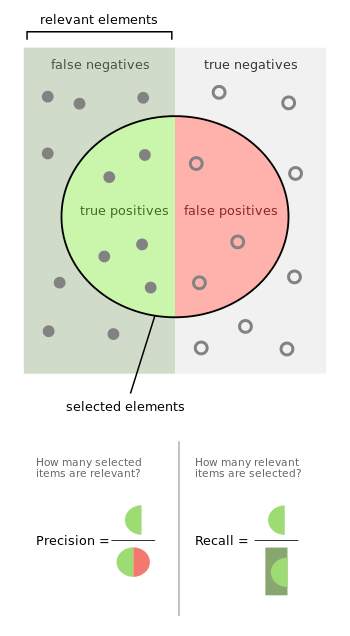<br> [Image Source](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/350px-Precisionrecall.svg.png) <hr>

Let us understand Precision and Recall with a real life example

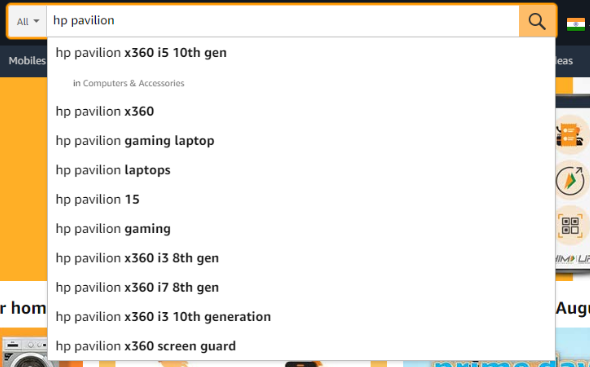 <hr>

In the image above we have searched for 'hp pavilion', _so the ratio of relevant suggestions out of all the rendered suggestions becomes our Precision_.<br> 

_Recall would be ratio of the relevant suggestions rendered to all the relevant suggestions that exist_. The suggestions we could see aren't the only relevant suggestions, there are many other terms/strings which are relevant to the search query.<br>

So we should thoroughly understand the problem statement before deciding the metric to use.

Suppose we build a AI system to list the corrupt people, in this case we would be interested in High Recall as we would want to identify all the corrupt people that exist as missing anyone of them is injustice and harm to society.<hr>

If correctly identifying the positives is our goal then we should go with Sensitivity (Recall) but if our goal is to correctly identify the negative then we should go for Specificity. So the choice of metric to use completely depends on what you aim to achieve

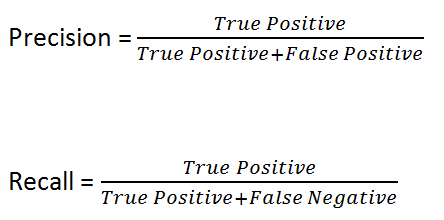<br>[Image Source](https://miro.medium.com/max/888/1*7J08ekAwupLBegeUI8muHA.png)

### We should not use Accuracy when the data is imbalanced. Why?
Suppose in the above data set with features X and target y, if we build a model which always predicts the majority class let us see what will happen 

We will fill `y_pred` with the mode of the target column i.e. `y`

In [9]:
y_pred = np.full(shape=y.shape, fill_value=stats.mode(y)[0][0])

In [10]:
accuracy_score(y, y_pred)

0.9001

This gives us an accuracy of 90% as we have classified all the samples as the majority class, but we have badly failed to classify any of the sample of the minority class.

In [11]:
print('Precision: {:.2f}, Recall: {:.2f}'.format(precision_score(y, y_pred),
                                                recall_score(y, y_pred)))

Precision: 0.00, Recall: 0.00


Let us try re-creating a similar dataset but with a twist. <br>
Earlier we had `weights=[0.9]` and now we have `weights=[0.1]`. It is doing one and the same thing.  

In [12]:
X_new, y_new = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                                   n_clusters_per_class=1, weights=[0.1], flip_y=0)

In [13]:
counter_new = Counter(y_new)
print(counter_new)

Counter({1: 9000, 0: 1000})


We can see that earlier `label 1` was our minority class now it has become our majority class. Let us do the same that we have done above and then check the `metrics`

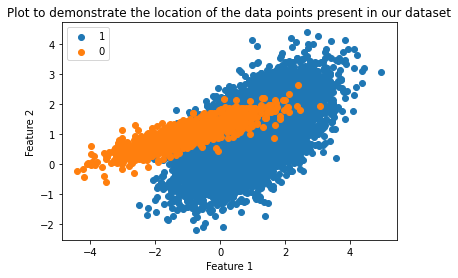

In [14]:
for label, _ in counter_new.items():
    index = np.where(label == y_new)[0]
    plt.scatter(x=X_new[index, 0], y=X_new[index, 1], label=str(label))

plt.title('Plot to demonstrate the location of the data points present in our dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [15]:
y_pred_new = np.full(shape=y_new.shape, fill_value=stats.mode(y_new)[0][0])

In [16]:
accuracy_score(y_new, y_pred_new)

0.9

In [17]:
print('Precision: {:.2f}, Recall: {:.2f}'.format(precision_score(y_new, y_pred_new), 
                                                recall_score(y_new, y_pred_new)))

Precision: 0.90, Recall: 1.00


The accuracy is still the same, but the Precision and Recall have improved terribly. High Precision and High Recall is what we strive for. This means that our model is fabulous. And it is performing awesome even without using **Machine Learning**

But we ourselves know that our model would badly fail to correctly predict the minority class. So our belief that Precision and Recall could help us when we have imbalance data, failed.

This doesn't mean that Precision and Recall don't help when we deal with imbalanced data, they are super useful, but Precision and Recall have a huge hatred towards 0 and this is the case with most of the stuff in Data Science. This is what we have been taught, zero is bad, so we tend to ignore zero.

Had it been the case where 0 was the minority class and 1 was the majority class, `Precision and Recall` would have told us that our model is poor. We have already tried this at the start.

Usually we tend to see Severe imbalance in Fraud Detection, Churn Prediction etc. In such cases our focus is to correctly predict the minority class, so we want to give more importance to minority class. If such is a case then we should represent the minority class using `label 1`, if we do so then we could trust the result given by `Precision` and `Recall`.

Generally it is suggested to label the minority class with `label 1` so that we could trust `Precision` and `Recall`.

Same would be the case with `F1 score` because `F1 score` uses `Precision` and `Recall` for its calculation. And also when `Precision and Recall` is high `F1 score` is also high.<hr>

But an important thing to note is it that it is very difficult to get high `F1 score`, as a high `F1 score` would require High `Precision` and High `Recall` but it is difficult to achieve. Because when we try to achieve High `Recall` we tend to say that we want to predict all the positive labels correctly which also leads to increase in `False positive`, increase in `False positive` leads to decrease in Precision (this is also evident from the formula)

If we consider the Churn prediction use-case so here if there are actually 100 customers who might leave our service and out of those if we predict that 20 are about to churn. Let's say out of those 20, 19 are correct (they would churn) so our `Precision` is quite high in this case. As `Precision` tries to check out of the 20 we predicted how many were correct, which is 19 in our case and that's quite good. But `Recall` tries to check out of 100 how many customers have we correctly identified, so that ratio is quite low as we have just identified 19 out of 100.

Our aim is to identify maximum customers correctly and so `Recall` makes sense, increasing `Recall` might increase `False Positive` but `False positive` is not a major concern in this usecase as even if we identify a customer who won't churn as a customer will churn, there's not much harm in that,  but if we fail to identify a customer who will churn in future as a customer who won’t churn, then that's a huge problem.

So the selection of metric depends on what we want to achieve.

In [18]:
Counter(y)

Counter({0: 9001, 1: 999})

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=1)

In [20]:
Counter(y_train), Counter(y_test)

(Counter({1: 699, 0: 6301}), Counter({0: 2700, 1: 300}))

In [21]:
Counter(y_train)[0]/Counter(y_train)[1], Counter(y_test)[0]/Counter(y_test)[1] 

(9.014306151645208, 9.0)

So y_train and y_test have distribution similar to original dataset i.e. 90% of negative samples. This has happened because we have used `stratify=y` parameter. 

If we don't use `stratify=y` parameter, it might happen that the distribution won't be maintained and some classes would be present in train data and no record of a particular class might be there in test data

`stratify` parameter is used to demonstrate the importance of `stratified sampling`

In [22]:
logistic = LogisticRegression(solver='liblinear')
# We use liblinear because the documentaions says that for small datasets, 
# 'liblinear' is a good choice

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred), 
                                                                  recall_score(y_test, y_pred)))

Accuracy: 0.96, Precision: 0.88, Recall: 0.68


In [23]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline, make_pipeline

undersampled_data = SMOTE(sampling_strategy=0.5)

X_under, y_under = undersampled_data.fit_resample(X_train, y_train)

In [24]:
Counter(y_under)[1]/Counter(y_under)[0], Counter(y_under)

(0.49992064751626725, Counter({1: 3150, 0: 6301}))

In [25]:
logistic = LogisticRegression(solver='liblinear')
# We use liblinear because the documentaions says that for small datasets, 'liblinear' is a good choice
logistic.fit(X_under, y_under)
y_pred = logistic.predict(X_test)

f1_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred)

(0.7304860088365244, 0.6543535620052771, 0.8266666666666667)

To handle imbalanced data we would use `imbalanced-learn` package

`pip install imbalanced-learn`

In [26]:
!pip install imbalanced-learn

You are using pip version 19.0.3, however version 20.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## Undersampling
#### 1. RandomUnderSampler 
Under-sample the majority class(es) by randomly picking samples with or without replacement.

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline, make_pipeline

In [28]:
undersampled_data = RandomUnderSampler(sampling_strategy=0.5)

`sampling_strategy` parameter specifies the sampling information. `float` is only used for binary classification, it throws error for multi-class classification.

If we set `sampling_strategy = 0.1` that means the ratio of number of observations of minority class to the number of observations of majority class would be 0.1

In [29]:
X_under, y_under = undersampled_data.fit_resample(X_train, y_train)

In [30]:
Counter(y_under)

Counter({0: 1398, 1: 699})

In [31]:
minority, majority = Counter(y_under)[1], Counter(y_under)[0]

In [32]:
minority/majority

0.5

In [33]:
logistic = LogisticRegression(solver='liblinear')
# We use liblinear because the documentaions says that for small datasets, 'liblinear' is a good choice

logistic.fit(X_under, y_under)
y_pred = logistic.predict(X_test)

print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred), 
                                                                  recall_score(y_test, y_pred)))

Accuracy: 0.94, Precision: 0.66, Recall: 0.82


### Oversampling
#### 1. RandomOverSampler
Over-sample the minority class(es) by picking samples at random with replacement.

In [34]:
from imblearn.over_sampling import RandomOverSampler

oversampled_data = RandomOverSampler(sampling_strategy=0.5)

X_over, y_over = oversampled_data.fit_resample(X_train, y_train)

Counter(y_over)

Counter({1: 3150, 0: 6301})

In [35]:
minority, majority = Counter(y_over)[1], Counter(y_over)[0]

In [36]:
minority/majority

0.49992064751626725

In [37]:
logistic = LogisticRegression(solver='liblinear')
# We use liblinear because the documentaions says that for small datasets, 'liblinear' is a good choice

logistic.fit(X_over, y_over)
y_pred = logistic.predict(X_test)

print('Accuracy: {:.2f}, Precison: {:.2f}, Recall: {:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred), 
                                                                  recall_score(y_test, y_pred)))

Accuracy: 0.94, Precison: 0.65, Recall: 0.83


#### 2. SMOTE
SMOTE(Synthetic Minority Over-sampling Technique)  works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample as a point along that line.

In [38]:
from imblearn.over_sampling import SMOTE

oversampled_data = SMOTE(sampling_strategy=0.5)

X_smote, y_smote = oversampled_data.fit_resample(X, y)

Counter(y_smote)

Counter({0: 9001, 1: 4500})

In [39]:
minority, majority = Counter(y_over)[1], Counter(y_over)[0]

minority/majority

0.49992064751626725

In [40]:
logistic = LogisticRegression(solver='liblinear')
# We use liblinear because the documentaions says that for small datasets, 'liblinear' is a good choice

logistic.fit(X_smote, y_smote)
y_pred = logistic.predict(X_test)

print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred), 
                                                                  recall_score(y_test, y_pred)))

Accuracy: 0.94, Precision: 0.65, Recall: 0.83


## Combining Undersampling and Oversampling

We could either combine Undersampling and Oversampling manually or we could use inbuilt functionalities that to help us achieve this.

### Combining them manually

We would first apply oversampling with a `sampling_strategy=0.2` so this would create `X and y` where the ratio of minority class to majority class would be 0.2. This means that number of observations in minority class would be 20% of the majority class. <br>
So majority class = 6301 observations and minority class = 1260 observations

After this we would apply undersampling to under sample the majority class, here `sampling_strategy=0.5` would create `X and y` where the ratio of minority class to majority class would be 0.5 <br>
So majority class = 2520 observations and minority class = 1260 observations, also minority to majority ratio is 0.5.

In [41]:
over_sampler = RandomOverSampler(sampling_strategy=0.2)
under_sampler = RandomUnderSampler(sampling_strategy=0.5)

X_over, y_over = over_sampler.fit_resample(X_train, y_train)

minority, majority = Counter(y_over)[1], Counter(y_over)[0]

print('{:.1f}'.format(minority/majority))

0.2


In [42]:
Counter(y_train)

Counter({1: 699, 0: 6301})

In [43]:
Counter(y_over)

Counter({1: 1260, 0: 6301})

The ratio of `majority` to `minority` is same as our `sampling_strategy`

In [44]:
X_under, y_under = under_sampler.fit_resample(X_over, y_over)

minority, majority = Counter(y_under)[1], Counter(y_under)[0]

minority/majority

0.5

In [45]:
Counter(y_under)

Counter({0: 2520, 1: 1260})

The ratio of `majority` to `minority` is same as our `sampling_strategy`

In [46]:
logistic = LogisticRegression(solver='liblinear')
# We use liblinear because the documentaions says that for small datasets, 'liblinear' is a good choice

logistic.fit(X_under, y_under)
y_pred = logistic.predict(X_test)

print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred), 
                                                                  recall_score(y_test, y_pred)))

Accuracy: 0.94, Precision: 0.65, Recall: 0.82


### Pipeline
There are many scenarios where we have a fixed set of transformations to be performed on the data, post which we would like to fit a model. All these things need not be done separately, we can create a pipleine and add all the transformations followed by the model we want to fit to the pipeline. Using pipeline makes our life easier.

Intermediate steps of the pipeline must be ‘transforms’, that is, they must implement fit and transform methods. The final estimator only needs to implement fit.<hr>

Below we create a pipeline where we first add `oversampler` followed by `undersampler` which is then followed by a ML model which we would like to fit.

In [47]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

under_sampler = RandomUnderSampler()
oversampled_data = SMOTE()

# Initilaize pipeline with the required steps
pipeline = Pipeline([('smote', oversampled_data), ('under', under_sampler),
                     ('model', LogisticRegression())])

scoring = ['accuracy', 'precision', 'recall']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating the model
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1,  return_train_score=True)
print('Accuracy: {:.2f}, Precison: {:.2f}, Recall: {:.2f}'.format(np.mean(scores['test_accuracy']),
                                                                  np.mean(scores['test_precision']),
                                                                  np.mean(scores['test_recall'])))

Accuracy: 0.91, Precison: 0.52, Recall: 0.88


Here we can observe that recall is `0.88` and we have used Cross-Validation so the model is tested on entire data. So this result is always better than result that we obtain from `train_test_split` as it can be trusted more.

#### Combining `SMOTE` oversampling with any other undersampling method is found to perform better

## Pre-defined Oversampling with Undersampling
<ul>
<li> SMOTE + Tomek Links 
<li> SMOTE + Edited NearestNeighbors
<ul/>

In [48]:
from imblearn.combine import SMOTEENN

combined_sampling = SMOTEENN()

# Create model object
logistic = LogisticRegression(solver='liblinear')

# Initilaize pipeline with the required steps

pipeline = Pipeline(steps=[('combined', combined_sampling), ('model', logistic)])

scoring = ['accuracy', 'precision', 'recall']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating the model
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1,  return_train_score=True)
print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(np.mean(scores['test_accuracy']),
                                                                  np.mean(scores['test_precision']),
                                                                  np.mean(scores['test_recall'])))

Accuracy: 0.90, Precision: 0.51, Recall: 0.88


Here we can observe that recall is `0.88` and we have used Cross-Validation so the model is tested on entire data. So this result is always better than result that we obtain from `train_test_split` as it can be trusted more.

## Incorrect practice

In [49]:
oversampled_data = SMOTE(sampling_strategy=0.5)

X_over, y_over = oversampled_data.fit_resample(X, y)

# We use liblinear because the documentaions says that for small datasets, 'liblinear' is a good choice

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluating the model
scores = cross_validate(pipeline, X, y, scoring=scoring, cv=cv, n_jobs=-1,  return_train_score=True)
print('Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}'.format(np.mean(scores['test_accuracy']),
                                                                  np.mean(scores['test_precision']),
                                                                  np.mean(scores['test_recall'])))

Accuracy: 0.90, Precision: 0.51, Recall: 0.88


In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, 
                                                    test_size=0.3,
                                                    stratify=y_over)

In [51]:
logistic = LogisticRegression(solver='liblinear')
# We use liblinear because the documentaions says that for small datasets, 'liblinear' is a good choice

logistic.fit(X_train, y_train)
y_pred = logistic.predict(X_test)

print('Accuracy: {:.2f}, Precison: {:.2f}, Recall: {:.2f}'.format(accuracy_score(y_test, y_pred), 
                                                                  precision_score(y_test, y_pred), 
                                                                  recall_score(y_test, y_pred)))

Accuracy: 0.92, Precison: 0.91, Recall: 0.84


Here we have over-sampled the data and then we did `train_test_split,` this leads to **'Data-leakage'**. We should not apply any sampling technique to test data, sampling techniques are meant only for train data. This is where `Pipelines` are useful, they are quite smart and they take care of such things. They would only apply those transformations to train data which are meant for train data, same happens with test data as well, so we don't fall trap to 'Data-leakage'.

